# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [1]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2024-05-02 07:01:21--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.4’

Miniconda3-py37_4.8 100%[===================>]  81.12M  72.6MB/s    in 1.1s    

2024-05-02 07:01:22 (72.6 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.4’ saved [85055499/85055499]

PREFIX=/usr/local
./Miniconda3-py37_4.8.2-Linux-x86_64.sh: line 392: /usr/local/conda.exe: Permission denied
chmod: cannot access '/usr/local/conda.exe': No such file or directory
Unpacking payload ...
./Miniconda3-py37_4.8.2-Linux-x86_64.sh: line 404: /usr/local/conda.exe: No such file or directory
./Miniconda3-py37_4.8.2-Linux-x86_64.sh: line 406: /usr/local/conda.exe: No such

## **Load bioactivity data**

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('MgluR5_bioactivity_data_preprocessed.csv')

## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [4]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [5]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [6]:
# Drop rows with null values in specific columns (e.g., 'canonical_smiles')
df_cleaned = df.dropna(subset=['canonical_smiles'])

In [7]:
df_lipinski = lipinski(df_cleaned.canonical_smiles)

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [8]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,193.249000,2.78982,0.0,1.0
1,193.249000,2.78982,0.0,1.0
2,195.265000,3.56042,0.0,1.0
3,195.265000,3.56042,0.0,1.0
4,243.326148,2.93622,0.0,2.0
...,...,...,...,...
2102,333.435000,3.98980,0.0,3.0
2103,376.362000,4.28180,1.0,3.0
2104,409.461000,3.88580,0.0,6.0
2105,395.811000,1.19830,4.0,5.0


In [9]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL66654,Cc1cccc(C#Cc2ccccc2)n1,36.0,active
1,CHEMBL66654,Cc1cccc(C#Cc2ccccc2)n1,20.0,active
2,CHEMBL88612,Cc1cccc(/C=C/c2ccccc2)n1,3000.0,active
3,CHEMBL88612,Cc1cccc(/C=C/c2ccccc2)n1,1100.0,active
4,CHEMBL2112677,[3H]C([3H])([3H])OCc1cccc(C#Cc2cccc(C)n2)c1,10.0,inactive
...,...,...,...,...
2205,NaN,NaN,NaN,active
2206,NaN,NaN,NaN,active
2207,NaN,NaN,NaN,active
2208,NaN,NaN,NaN,active


Now, let's combine the 2 DataFrame

In [10]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [11]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL66654,Cc1cccc(C#Cc2ccccc2)n1,36.0,active,193.249000,2.78982,0.0,1.0
1,CHEMBL66654,Cc1cccc(C#Cc2ccccc2)n1,20.0,active,193.249000,2.78982,0.0,1.0
2,CHEMBL88612,Cc1cccc(/C=C/c2ccccc2)n1,3000.0,active,195.265000,3.56042,0.0,1.0
3,CHEMBL88612,Cc1cccc(/C=C/c2ccccc2)n1,1100.0,active,195.265000,3.56042,0.0,1.0
4,CHEMBL2112677,[3H]C([3H])([3H])OCc1cccc(C#Cc2cccc(C)n2)c1,10.0,inactive,243.326148,2.93622,0.0,2.0
...,...,...,...,...,...,...,...,...
2205,NaN,NaN,NaN,active,NaN,NaN,NaN,NaN
2206,NaN,NaN,NaN,active,NaN,NaN,NaN,NaN
2207,NaN,NaN,NaN,active,NaN,NaN,NaN,NaN
2208,NaN,NaN,NaN,active,NaN,NaN,NaN,NaN


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [12]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [13]:
df_combined.standard_value.describe()

count    2.107000e+03
mean     1.497092e+04
std      2.220090e+05
min      3.200000e-01
25%      5.450000e+01
50%      3.920000e+02
75%      3.100000e+03
max      1.000000e+07
Name: standard_value, dtype: float64

In [14]:
-np.log10( (10**-9)* 100000000 )

1.0

In [15]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [16]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [17]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop(columns=['standard_value'])  # Use 'columns' argument to specify column names
        
    return x

# Apply the norm_value() function to normalize the 'standard_value' column
df_norm = norm_value(df_combined)
df_norm 

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL66654,Cc1cccc(C#Cc2ccccc2)n1,active,193.249000,2.78982,0.0,1.0,36.0
1,CHEMBL66654,Cc1cccc(C#Cc2ccccc2)n1,active,193.249000,2.78982,0.0,1.0,20.0
2,CHEMBL88612,Cc1cccc(/C=C/c2ccccc2)n1,active,195.265000,3.56042,0.0,1.0,3000.0
3,CHEMBL88612,Cc1cccc(/C=C/c2ccccc2)n1,active,195.265000,3.56042,0.0,1.0,1100.0
4,CHEMBL2112677,[3H]C([3H])([3H])OCc1cccc(C#Cc2cccc(C)n2)c1,inactive,243.326148,2.93622,0.0,2.0,10.0
...,...,...,...,...,...,...,...,...
2205,NaN,NaN,active,NaN,NaN,NaN,NaN,NaN
2206,NaN,NaN,active,NaN,NaN,NaN,NaN,NaN
2207,NaN,NaN,active,NaN,NaN,NaN,NaN,NaN
2208,NaN,NaN,active,NaN,NaN,NaN,NaN,NaN


In [18]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL66654,Cc1cccc(C#Cc2ccccc2)n1,active,193.249000,2.78982,0.0,1.0,36.0
1,CHEMBL66654,Cc1cccc(C#Cc2ccccc2)n1,active,193.249000,2.78982,0.0,1.0,20.0
2,CHEMBL88612,Cc1cccc(/C=C/c2ccccc2)n1,active,195.265000,3.56042,0.0,1.0,3000.0
3,CHEMBL88612,Cc1cccc(/C=C/c2ccccc2)n1,active,195.265000,3.56042,0.0,1.0,1100.0
4,CHEMBL2112677,[3H]C([3H])([3H])OCc1cccc(C#Cc2cccc(C)n2)c1,inactive,243.326148,2.93622,0.0,2.0,10.0
...,...,...,...,...,...,...,...,...
2205,NaN,NaN,active,NaN,NaN,NaN,NaN,NaN
2206,NaN,NaN,active,NaN,NaN,NaN,NaN,NaN
2207,NaN,NaN,active,NaN,NaN,NaN,NaN,NaN
2208,NaN,NaN,active,NaN,NaN,NaN,NaN,NaN


In [19]:
df_norm.standard_value_norm.describe()

count    2.107000e+03
mean     1.497092e+04
std      2.220090e+05
min      3.200000e-01
25%      5.450000e+01
50%      3.920000e+02
75%      3.100000e+03
max      1.000000e+07
Name: standard_value_norm, dtype: float64

In [20]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i * (10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop(columns=['standard_value_norm'])  # Use 'columns' argument to specify column names
        
    return x

# Apply the pIC50() function to calculate pIC50 values
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL66654,Cc1cccc(C#Cc2ccccc2)n1,active,193.249000,2.78982,0.0,1.0,7.443697
1,CHEMBL66654,Cc1cccc(C#Cc2ccccc2)n1,active,193.249000,2.78982,0.0,1.0,7.698970
2,CHEMBL88612,Cc1cccc(/C=C/c2ccccc2)n1,active,195.265000,3.56042,0.0,1.0,5.522879
3,CHEMBL88612,Cc1cccc(/C=C/c2ccccc2)n1,active,195.265000,3.56042,0.0,1.0,5.958607
4,CHEMBL2112677,[3H]C([3H])([3H])OCc1cccc(C#Cc2cccc(C)n2)c1,inactive,243.326148,2.93622,0.0,2.0,8.000000
...,...,...,...,...,...,...,...,...
2205,NaN,NaN,active,NaN,NaN,NaN,NaN,NaN
2206,NaN,NaN,active,NaN,NaN,NaN,NaN,NaN
2207,NaN,NaN,active,NaN,NaN,NaN,NaN,NaN
2208,NaN,NaN,active,NaN,NaN,NaN,NaN,NaN


In [21]:
df_final.pIC50.describe()

count    2107.000000
mean        6.368278
std         1.201552
min         2.000000
25%         5.508638
50%         6.406714
75%         7.263622
max         9.494850
Name: pIC50, dtype: float64

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [22]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL66654,Cc1cccc(C#Cc2ccccc2)n1,active,193.249000,2.78982,0.0,1.0,7.443697
1,CHEMBL66654,Cc1cccc(C#Cc2ccccc2)n1,active,193.249000,2.78982,0.0,1.0,7.698970
2,CHEMBL88612,Cc1cccc(/C=C/c2ccccc2)n1,active,195.265000,3.56042,0.0,1.0,5.522879
3,CHEMBL88612,Cc1cccc(/C=C/c2ccccc2)n1,active,195.265000,3.56042,0.0,1.0,5.958607
4,CHEMBL2112677,[3H]C([3H])([3H])OCc1cccc(C#Cc2cccc(C)n2)c1,inactive,243.326148,2.93622,0.0,2.0,8.000000
...,...,...,...,...,...,...,...,...
2205,NaN,NaN,active,NaN,NaN,NaN,NaN,NaN
2206,NaN,NaN,active,NaN,NaN,NaN,NaN,NaN
2207,NaN,NaN,active,NaN,NaN,NaN,NaN,NaN
2208,NaN,NaN,active,NaN,NaN,NaN,NaN,NaN


---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [23]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

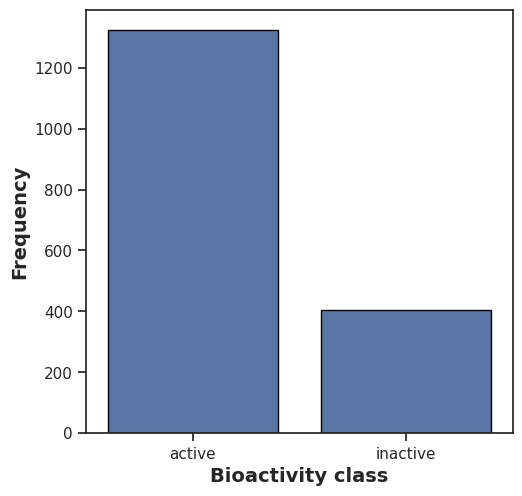

In [24]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

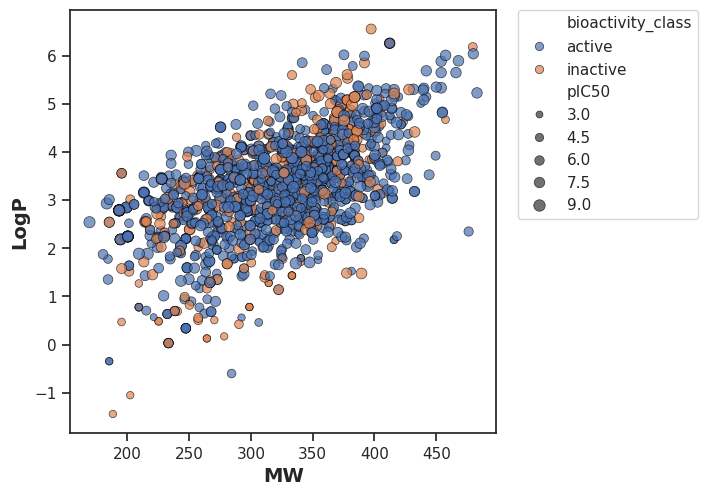

In [25]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

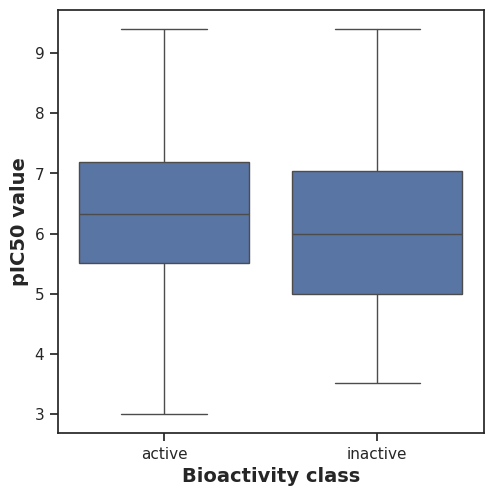

In [26]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [27]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [28]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,NaN,NaN,0.05,Different distribution (reject H0)


#### **MW**

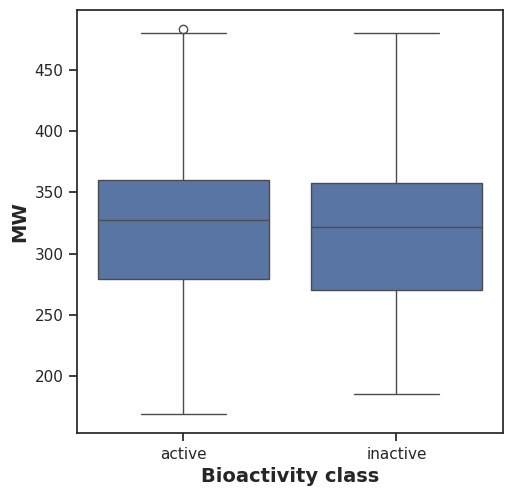

In [29]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [30]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,NaN,NaN,0.05,Different distribution (reject H0)


#### **LogP**

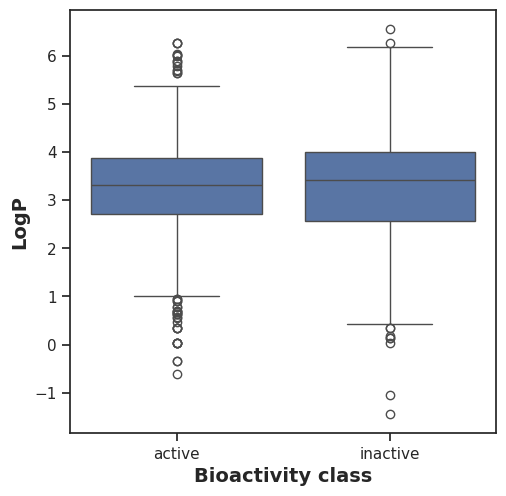

In [31]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [32]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,NaN,NaN,0.05,Different distribution (reject H0)


#### **NumHDonors**

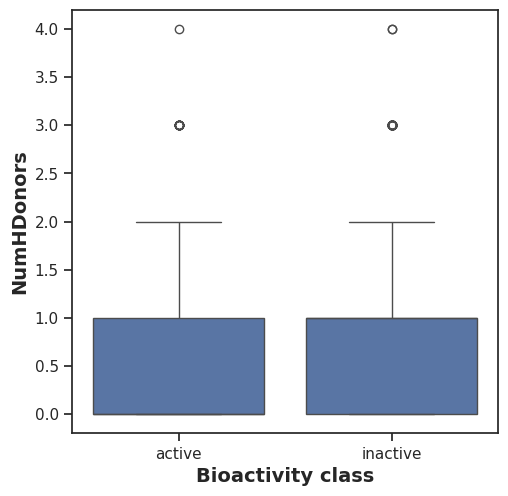

In [33]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [34]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,NaN,NaN,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

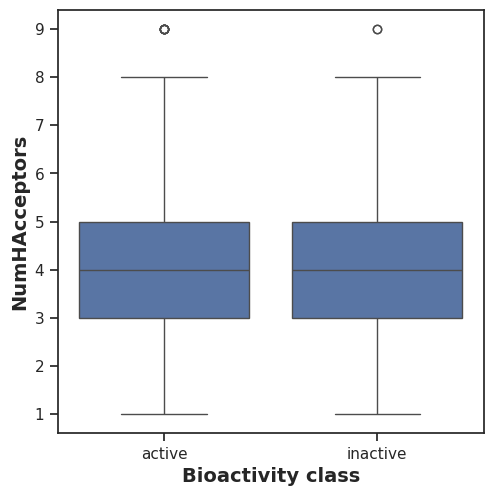

In [35]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [36]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,NaN,NaN,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited ***no difference*** between the **actives** and **inactives** while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows ***statistically significant difference*** between **actives** and **inactives**.

## **Zip files**

In [37]:
! zip -r results.zip . -i *.csv *.pdf

updating: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
updating: MgluR5_bioactivity_data_raw.csv (deflated 93%)
updating: plot_bioactivity_class.pdf (deflated 38%)
updating: MgluR5_05_bioactivity_data_2class_pIC50.csv (deflated 77%)
updating: mannwhitneyu_MW.csv (deflated 6%)
updating: MgluR5_bioactivity_data_preprocessed.csv (deflated 82%)
updating: mannwhitneyu_pIC50.csv (deflated 9%)
updating: mannwhitneyu_NumHDonors.csv (deflated 9%)
updating: plot_LogP.pdf (deflated 38%)
updating: plot_NumHAcceptors.pdf (deflated 37%)
updating: mannwhitneyu_LogP.csv (deflated 6%)
updating: plot_NumHDonors.pdf (deflated 39%)
updating: MgluR5_02_bioactivity_data_preprocessed.csv (deflated 81%)
updating: plot_ic50.pdf (deflated 36%)
updating: plot_MW_vs_LogP.pdf (deflated 3%)
updating: MgluR5_04_bioactivity_data_3class_pIC50.csv (deflated 77%)
updating: plot_MW.pdf (deflated 38%)
updating: MgluR5_03_bioactivity_data_curated.csv (deflated 82%)
updating: MgluR5_01_bioactivity_data_raw.csv (deflated 93